# **Lab 1: Introduction to Natural Language Processing with PyTorch**

In this lab, you will:
- Gain basic familiarity with implementing neural networks in PyTorch, a deep learning library
- Practice loading and preprocessing data for NLP
- Perform named entity recognition with a recurrent LSTM network (Long Short-Term Memory)
- Use an LSTM to predict the genre of a film based on a short plot summary

**Sections where you have to write code or answer questions are marked with 📝.**

To start, make a copy of this notebook to your google drive, using `File -> Save a copy in Drive`. This should open a new tab, with your copy of the notebook open.



---

## **0 - Setup**

---


This block will download the data and packages needed for this lab.

Once you have run this block, open the `Files` panel in Colab. You should be able to see a folder, `data`, containing `movies.csv` and `ner.csv`.

In [ ]:
# Download data
!gdown --fuzzy 'https://drive.google.com/drive/folders/1bskNgDJ74j1IDedrAujJyc_dlZ1TJF1I?usp=sharing' -O data --folder

# Install packages
!pip install torchview hiddenlayer

Retrieving folder contents
Processing file 1iiBGOcG-NPdfovblQAI7SeFsNnbnFb2F movies.csv
Processing file 1BrjrgkDfUXcRK0VaVRfAphwVBpyDY5oA ner.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1iiBGOcG-NPdfovblQAI7SeFsNnbnFb2F
To: /content/data/movies.csv
100% 81.2M/81.2M [00:01<00:00, 80.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1BrjrgkDfUXcRK0VaVRfAphwVBpyDY5oA
To: /content/data/ner.csv
100% 13.7M/13.7M [00:00<00:00, 24.6MB/s]
Download completed


---
## **1 - Introduction to PyTorch** 📝
---

There are many deep learning libraries in Python. You might have heard of TensorFlow, Keras or Flax/Linen/Haiku. In this lab, we use PyTorch, because it's probably the most widely used in industry and research.



---

### **1.1 - Tensors**

In PyTorch, data is represented as *tensors*. Tensors resemble n-dimensional NumPy arrays, but they are a) compatible with GPUs and b) can be used in backpropagation.

To create tensors, we need to import the Pytorch library, `torch`.
In the cell below we create 4 tensors with different shapes.
The shape of tensor `x` can be found by calling `x.size()` or `x.shape`.

In [ ]:
import torch

# 0-dimensional tensor (scalar)
a = torch.tensor(7)
# 1-dimensional tensor (vector)
b = torch.tensor([5.3, 2.3, 1.5, 2.0, 3.1])
# 2-dimensional tensor (matrix)
c = torch.tensor(
    [[10, 2, 4],
     [5, 2, 10]],
)
# 3-dimensional tensor
d = torch.tensor(
    [
        [[10, 2], [5, 2]],
        [[3, 1], [15, 8]],
    ],
)

print('a = ', a)
print('b = ', b)
print('c = ', c)
print('d = ', d)

a =  tensor(7)
b =  tensor([5.3000, 2.3000, 1.5000, 2.0000, 3.1000])
c =  tensor([[10,  2,  4],
        [ 5,  2, 10]])
d =  tensor([[[10,  2],
         [ 5,  2]],

        [[ 3,  1],
         [15,  8]]])


In [ ]:
# Getting the size of each tensor
a_size = a.size()
b_size = b.size()
c_size = c.size()
d_size = d.size()

print('Size of a is:', a_size)
print('Size of b is:', b_size)
print('Size of c is:', c_size)
print('Size of d is:', d_size)

# The size of a tensor along a particular axis can be accessed directly,
# either by calling size() at a particular index or indexing the resulting object
print('the first element of the size of d is: ', d.size(1))
# OR
print('the first element of the size of d is: ', d_size[1])

# You can also use .shape to get the tensor's size
# Note: shape is a *property* and size is a *method*
# which means that their syntax is different:
#       x.size()        # Correct
#       x.shape         # Correct
#       x.shape()       # Incorrect
print("Size of d is:", d.shape)

Size of a is: torch.Size([])
Size of b is: torch.Size([5])
Size of c is: torch.Size([2, 3])
Size of d is: torch.Size([2, 2, 2])
the first element of the size of d is:  2
the first element of the size of d is:  2
Size of d is: torch.Size([2, 2, 2])


Just like in NumPy, PyTorch tensors also have *types*, reflecting the precision they are stored as in memory.

Some common types are:
*   `torch.float64` (double precision)
*   `torch.float32` (single precision)
*   `torch.bool` (boolean values)
*   `torch.int32` (integers)

Tensor types need to match when doing calculations with them. If you get errors about a type mismatch, you might need to set the dtype of your tensor.
To cast tensors to different types, use `.to(dtype=...)`.

In [ ]:
# Checking the Tensor type
print("Type of 'a' is:", a.dtype)
print("Type of 'b' is:", b.dtype)

# Casting the tensor to another type
a_as_float32 = a.to(dtype=torch.float32)
print("Type of 'a_as_float32' is", a_as_float32.dtype)
# Notice the original tensor type does not change
print("Type of 'a' is still", a.dtype)

# The tensor type can also be declared during the creation of the tensor
a = torch.tensor(7 , dtype=torch.double)
print("Type of 'a' after declaring the type", a.dtype)


Type of 'a' is: torch.int64
Type of 'b' is: torch.float32
Type of 'a_as_float32' is torch.float32
Type of 'a' is still torch.int64
Type of 'a' after declaring the type torch.float64


PyTorch tensors can be constructed from a NumPy array, and converted back into NumPy arrays. This is often useful when saving or loading data.

In [ ]:
import numpy as np

x_numpy = np.random.randn(2,2)
print(f'x_numpy = ', x_numpy)
x_torch = torch.tensor(x_numpy)
print(f'creating a tensor from x_numpy = ',x_torch)
x_torch_to_numpy = x_torch.numpy()

# Checking the type:
print(f'Type of x_numpy is: ', type(x_numpy))
print(f'Type of x_torch is: ', type(x_torch))
print(f'Type of x_torch converted back to numpy is: ', type(x_torch_to_numpy))


x_numpy =  [[ 0.18374883  1.59862491]
 [ 1.83418503 -0.23981989]]
creating a tensor from x_numpy =  tensor([[ 0.1837,  1.5986],
        [ 1.8342, -0.2398]], dtype=torch.float64)
Type of x_numpy is:  <class 'numpy.ndarray'>
Type of x_torch is:  <class 'torch.Tensor'>
Type of x_torch converted back to numpy is:  <class 'numpy.ndarray'>


---
### **1.2 - Automatic differentiation 📝**

Everything we've seen so far should be broadly familiar from NumPy. The part that makes PyTorch tensors special is their ability to keep track of gradient information.

 In order to be able to compute gradients for a tensor, it must be constructed with `requires_grad=True`.

For deep learning, the gradient we're most interested in is the gradient of the *loss* with respect to the *parameters*. This is what is used in backpropagation. We'll run through an example below.

Consider a simple linear model,
$$
\mathbf{y} = \mathbf{W} \mathbf{x} + \mathbf{b},
$$
where $\mathbf{y} \in \mathbb{R}^m$, $\mathbf{x} \in \mathbb{R}^n$, $\mathbf{W} \in \mathbb{R}^{m \times n}$, and $\mathbf{b} \in \mathbb{R}^m$.
The parameters of this model are the *weights*, $\mathbf{W}$, and the *bias* (or offset) $\mathbf{b}$.

In [ ]:
# Define an example input-output pair
x = torch.tensor([1., 3., 10.])
y = torch.tensor([15., 8.])

input_dim = x.shape[0]
output_dim = y.shape[0]

# Initialise the parameters randomly
# BUT keep track of their gradients
torch.manual_seed(0) # We set a fixed random seed for reproducibility
W = torch.randn(output_dim, input_dim, requires_grad=True)
b = torch.randn(output_dim, requires_grad=True)
z = W @ x + b
z

tensor([-20.7238, -15.8331], grad_fn=<AddBackward0>)

Note that because we set `requires_grad=True` on the parameters $\mathbf{W}$ and $\mathbf{b}$, the output of our model has a `grad_fun` attribute. This denotes the last operation in the sequence of operations that were performed to get this tensor. Behind the scenes, the whole computational tree corresponding to the operations is stored, which is what is needed for autodiff.

If we want to fit this model, we might want to minimise the sum of squared errors between our true data and the output of our model.

In [ ]:
loss = torch.sum((z - y)**2)
loss

tensor(1844.2075, grad_fn=<SumBackward0>)

Note that because the output `z` had `requires_grad=True`, the loss also has a `grad_fun` attribute, showing that PyTorch has been keeping track of the computational graph.

Now we have a loss and some parameters, we can compute the gradients!
To do so, we call `.backward()` on the loss function. This instructs PyTorch to perform the backwards pass through the computational tree, updating the gradient information as it goes.

Once `loss.backward()` is called, the gradients of every tensor in the tree that has `requires_grad=True` with respect to the loss can be found by accessing their `.grad` attribute. For example,
$$
\mathtt{b.grad} = \begin{bmatrix} \frac{\partial{L}}{\partial b_1} \\ \frac{\partial{L}}{\partial b_2}\end{bmatrix}.
$$

In [ ]:
loss.backward()
print(W.grad)
print(b.grad)

tensor([[ -71.4477, -214.3430, -714.4768],
        [ -47.6661, -142.9984, -476.6613]])
tensor([-71.4477, -47.6661])


📝 **What happens if we try and convert a tensor that is attached to the computational graph to a NumPy array?**

In [ ]:
# TODO: get the numpy version of the W tensor
# ...
#W.numpy()

PyTorch provides an informative error. As NumPy arrays do not store gradients, tensors with gradient information must first be detached from the computational graph - losing their gradient information - before being converted.

---

### **1.3 - Models**

In PyTorch, models are defined by subclassing `torch.nn.Module`.
PyTorch Modules must have:
- An `__init__` constructor
- A `forward` method that represents the evaluation of the model on an input
- Anything that you want to treat as a model parameter defined in `__init__` as a tensor wrapped with `nn.Parameter`.

Below, we implement the simple linear model from the previous section as a `torch.nn.Module`.

In [ ]:
import torch.nn as nn

class LinearModel(nn.Module):
  def __init__(self, input_dim: int, output_dim: int):
    # Initialise the parent class
    super().__init__()
    # Initialise the parameters
    self.weight = nn.Parameter(
        torch.randn((output_dim, input_dim), requires_grad=True)
      )
    self.bias = nn.Parameter(
        torch.randn((output_dim,), requires_grad=True)
    )

  def forward(self, x):
    return self.weight @ x + self.bias


# Reset the random seed to what it was earlier
torch.manual_seed(0)
# Create an instance of our module
linear_model = LinearModel(input_dim, output_dim)

# To evaluate the model, we just use the .__call__() method
# (ie treat the class like a function)
# .__call__() is a wrapper around .forward(), with some extra processing that we
# don't need to worry about for now
output = linear_model(x)
assert torch.all(output == z)

As neural networks are the basic building block of deep learning, PyTorch has many neural network components predefined as `nn.Module`s.

In fact, the linear model we've been using so far has a predefined equivalent: `nn.Linear`.

In [ ]:
default_linear_model = nn.Linear(in_features=input_dim, out_features=output_dim)


print("W (default_linear_model) = ", default_linear_model.weight)
print("W (linear_model) = ", linear_model.weight)
print("")
print("b (default_linear_model) = ", default_linear_model.bias)
print("b (linear_model) = ", linear_model.bias)

W (default_linear_model) =  Parameter containing:
tensor([[ 0.2282,  0.3464, -0.3914],
        [-0.2514,  0.2097,  0.4794]], requires_grad=True)
W (linear_model) =  Parameter containing:
tensor([[ 1.5410, -0.2934, -2.1788],
        [ 0.5684, -1.0845, -1.3986]], requires_grad=True)

b (default_linear_model) =  Parameter containing:
tensor([-0.1188,  0.4320], requires_grad=True)
b (linear_model) =  Parameter containing:
tensor([0.4033, 0.8380], requires_grad=True)


Although the exact values are different, we can see that the parameters have the same shape and `requires_grad` as before.

*Aside: the initialisation of the parameters in `nn.Linear` is handled internally, which is why the values are different to what we had in our manual implementation (this would be the case even if we reseeded the RNG before instantiating the class - try it and see). If you're interested, have a look at the [PyTorch source code](https://pytorch.org/docs/stable/_modules/torch/nn/modules/linear.html#Linear) for more details.*

---

### **1.4 - Training 📝**

Having defined a `nn.Module` representing our model, we will now use PyTorch's autodifferentiation and backpropagation capabilities to fit the parameters.

To begin, we first generate our data.

In [ ]:
true_W = torch.tensor([[1., 0., -1.], [0.5, 0.5, 0.5]])
true_b = torch.tensor([0.5, -0.5])

n_training_samples = 20
n_test_samples = 10
x_train = torch.rand((n_training_samples, input_dim))
x_test = torch.rand((n_test_samples, input_dim))
# Because we now have a *batch* of x inputs, we need to do some manipulation
# to ensure the dimensions of the matrices align correctly
y_train = (true_W @ x_train.T).T + true_b
y_test = (true_W @ x_test.T).T + true_b

📝 **Using what you have already learned this session, fill in the gaps in the training loop below**.

In [ ]:
from tqdm import tqdm  # Used to display the progress bar
import matplotlib.pyplot as plt # Used to plot the loss

n_epochs = 50
learning_rate = 1
optimiser = torch.optim.SGD(default_linear_model.parameters(), lr=learning_rate)

train_losses = torch.empty(n_epochs)
test_losses = torch.empty(n_epochs)

for i in tqdm(range(n_epochs)):
  # Zero all the gradients of the parameters
  # This ensures that the gradients aren't computed cumulatively
  optimiser.zero_grad()

  # TODO: Evaluate `default_linear_model` on the training data
  # ...
  model_output_train = default_linear_model(x_train)

  # TODO: Compute the mean squared error (MSE) between the model output and the y_train values
  # ...
  train_loss = torch.mean((y_train - model_output_train)**2)

  # TODO: Compute the MSE on the test set
  # ...
  model_output_test = default_linear_model(x_test)
  test_loss = torch.mean((y_test - model_output_test)**2)

  # TODO: perform backpropagation step to compute the gradients of the MSE w.r.t the parameters
  # ...
  train_loss.backward()

  # Call the optimiser
  # This uses the computed gradients from backprop to adjust the model parameters
  optimiser.step()

  # TODO: Save the losses from this step
  # ...
  train_losses[i] = train_loss
  test_losses[i] = test_loss

100%|██████████| 50/50 [00:00<00:00, 1089.05it/s]


📝 **Plot the training and test loss curves using `matplotlib`.**

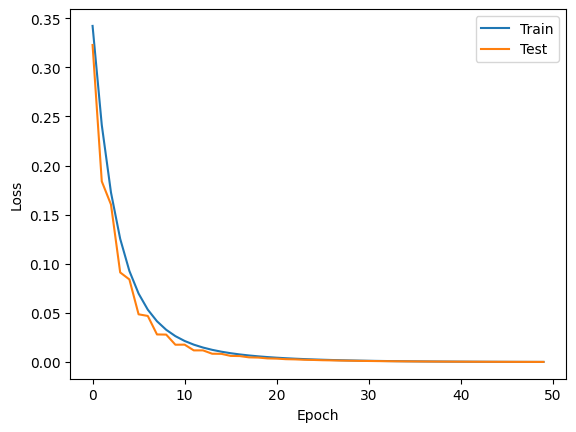

In [ ]:
import matplotlib.pyplot as plt

# TODO: Plot the training and test loss curves
# ...
plt.plot(torch.arange(n_epochs), train_losses.detach().numpy(), label="Train")
plt.plot(torch.arange(n_epochs), test_losses.detach().numpy(), label="Test")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

We can see that the training has converged, and the parameters of the model have indeed approached the true values:

In [ ]:
list(default_linear_model.named_parameters())

[('weight',
  Parameter containing:
  tensor([[ 1.0033,  0.0062, -0.9986],
          [ 0.4490,  0.4982,  0.4665]], requires_grad=True)),
 ('bias',
  Parameter containing:
  tensor([ 0.4939, -0.4543], requires_grad=True))]

---
### **1.5 Implementing an LSTM 📝**

Your task is now to implement a Long Short-Term Memory (LSTM) network as a `nn.Module`. We will use this network for the remainder of the lab.

LSTMs are a type of recurrent neural network (RNN) used in sequence prediction problems.
The LSTM architecture addresses the issue of vanishing gradients in conventional RNNs by adding an additional state, the *memory* (which stores information across many time steps) and additional operations called *gates* (which permit selective preservation or removal of information from memory at each step).


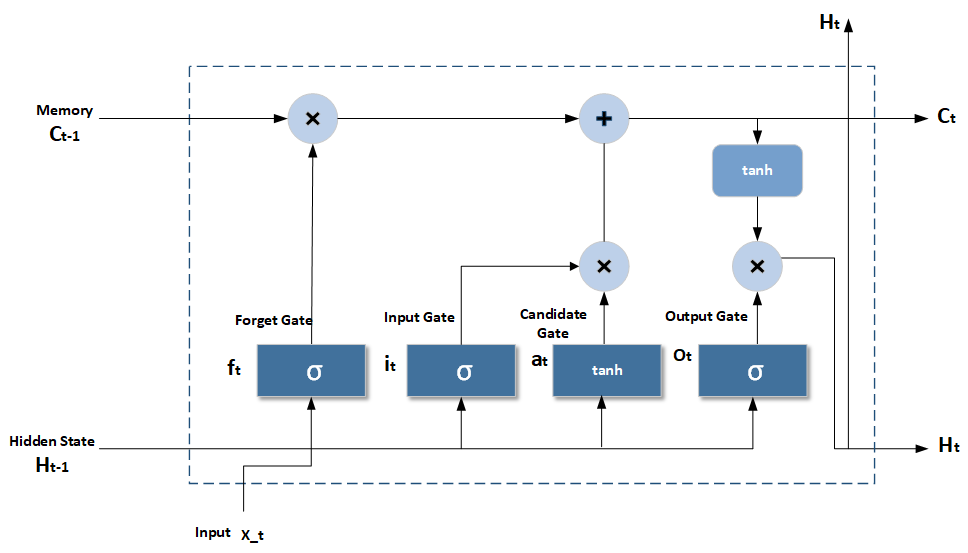

*(Image source: [Samina Amin, Medium](https://medium.com/@samina.amin/understanding-lstms-lstm-implementation-from-scratch-18965a150eca))*

LSTMs can be used for various sequence modelling problems, such as time series forecasting, speech recognition, and stock price prediction. As we will be using our LSTM for NLP, we will need to add an input embedding layer to represent words as real-valued vectors. We will also add an output linear plus softmax layer, to convert the outputs into probabilities.

📝 **In the next cell, implement a `nn.Module` for an LSTM.
Your implementation must meet the following criteria:**

- The class must be called `WordClassifierLSTM`.
- The constructor should take five arguments (not including `self`):
  - `num_hidden_layers`: an int, setting the number of layers within the LSTM.
  - `hidden_dim`: an `int`, setting the size of the LSTM layers.
  - `output_dim`: an `int`, setting the size of the model output.
  - `num_embeddings`: an int, setting the number of words that can be represented by the embedding layer.
  - `embedding_dim`: an int, setting the dimensionality of the embedding space.
- In the constructor, you should define the following:
  - `self.embedding`: a `nn.Embedding` object, with `num_embeddings` and `embedding_dim` (see [`nn.Embedding` docs](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html#torch.nn.Embedding.from_pretrained)).
  - `self.lstm`: a `nn.LSTM` object with input dimension equal to `embedding_dim`, hidden dimension equal to `hidden_dim`, `num_hidden_layers` hidden layers, **and with `batch_first` set to True** (see [`nn.LSTM` docs](https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html#torch.nn.LSTM)).
  - An output layer, consisting of:
    - `self.dense`: a `nn.Linear` object, going from the hidden dimension to the output dimension.
    - `self.softmax`: an `nn.Softmax` object acting along on the last dimension of the data ([see `nn.Softmax` docs](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html#torch.nn.Softmax)).
- In the `forward` method of the class, apply the layers in the following order: embedding, LSTM, dense, softmax.
- ⚠️ **Note: Calling the `self.lstm` layer will return a tuple of outputs consisting of the output, hidden state, and memory state (as described in the [docs](https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html#torch.nn.LSTM)). The correct way of applying our custom output layer is to apply the linear operation to the *output* of the LSTM. The hidden and memory states should be unused.**

In [ ]:
# TODO: Implement the WordClassifierLSTM nn.Module
# ...
class WordClassifierLSTM(nn.Module):
    def __init__(self, num_hidden_layers, hidden_dim, output_dim, num_embeddings, embedding_dim):
        super().__init__()
        self.embedding = torch.nn.Embedding(num_embeddings, embedding_dim)
        self.lstm = torch.nn.LSTM(input_size=embedding_dim, hidden_size=hidden_dim, batch_first=True, num_layers=num_hidden_layers)
        self.dense = torch.nn.Linear(in_features=hidden_dim, out_features=output_dim)
        self.softmax = torch.nn.Softmax(dim=-1)

    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.lstm(x)
        x = self.dense(x)
        x = self.softmax(x)
        return x

If you have implemented the LSTM correctly, the following tests should pass. Do not change the tests!

In [ ]:
# Generate the data for the unit tests
torch.manual_seed(42)
test_hidden_dim = 3
test_output_dim = 1
test_lstm = WordClassifierLSTM(num_hidden_layers=1, hidden_dim=test_hidden_dim, output_dim=test_output_dim, num_embeddings=10, embedding_dim=1)
test_input = torch.tensor([[0, 0], [1, 0], [1, 1]]) # A batch of test "input sentences"
correct_test_input_embedding = torch.tensor(
    [[[0.3367],
      [0.3367]],
     [[0.1288],
      [0.3367]],
     [[0.1288],
      [0.1288]]],
)
correct_lstm_layer_output = torch.tensor(
    [[[-0.0518, -0.1497, -0.2026],
      [-0.0533, -0.2350, -0.2782]],
     [[-0.0505, -0.1391, -0.2175],
      [-0.0508, -0.2312, -0.2821]],
     [[-0.0505, -0.1391, -0.2175],
      [-0.0465, -0.2212, -0.3019]]],
)
correct_lstm_layer_hidden_state = torch.tensor(
    [[[-0.0533, -0.2350, -0.2782],
      [-0.0508, -0.2312, -0.2821],
      [-0.0465, -0.2212, -0.3019]]],
)
correct_lstm_layer_memory_state = torch.tensor(
    [[[-0.0925, -0.3989, -0.5663],
      [-0.0880, -0.3926, -0.5729],
      [-0.0767, -0.3920, -0.5893]]],
)
correct_dense_layer_output = torch.tensor(
    [[[-0.3000],
      [-0.3023]],
     [[-0.2891],
      [-0.2983]],
     [[-0.2891],
      [-0.2847]]],
)
correct_softmax_output = torch.tensor(
    [[[1.],
      [1.]],
     [[1.],
      [1.]],
     [[1.],
      [1.]]],
)

# Perform the unit tests
assert torch.allclose(test_lstm.embedding(test_input), correct_test_input_embedding, rtol=1e-3), "Error in embedding layer"
test_lstm_layer_output, (test_lstm_layer_hidden_state, test_lstm_layer_memory_state) = test_lstm.lstm(correct_test_input_embedding)
assert torch.allclose(test_lstm_layer_output, correct_lstm_layer_output, rtol=1e-3), "Error in LSTM layer"
assert torch.allclose(test_lstm_layer_hidden_state, correct_lstm_layer_hidden_state, rtol=1e-3), "Error in LSTM layer"
assert torch.allclose(test_lstm_layer_memory_state, correct_lstm_layer_memory_state, rtol=1e-3), "Error in LSTM layer"
assert torch.allclose(test_lstm.dense(correct_lstm_layer_output), correct_dense_layer_output, rtol=1e-3), "Error in dense layer"
assert torch.allclose(test_lstm.softmax(correct_dense_layer_output), correct_softmax_output), "Error in softmax layer"
assert torch.allclose(test_lstm(test_input), correct_softmax_output, rtol=1e-3), "Error in .forward() method"

---
## **2 - Named entity recognition** 📝
---

Named Entity Recognition is the term for the identification of names of organisations, people, dates, and geographic locations in text. Today, NER is widely used in various fields to automate the information extraction process.


Below is an example of how a NER algorithm can highlight and extract particular entities from a given text document:

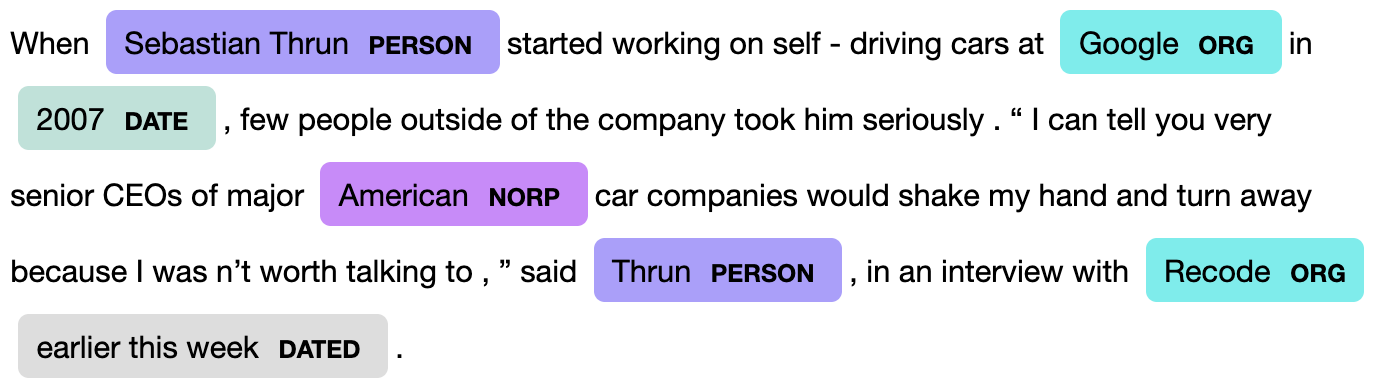

Some example use-cases of NER are:

- Online chatbots for businesses (e.g. understanding who they are talking to, identifying specific information such as delivery time, taxes etc)
- Medical data gathering (e.g. determining the quantity and types of drugs used in treatment based on patient's medical records)
- Document processing and classification (e.g. classifying news articles)

---
### **2.1 - Data preprocessing 📝**

In this section, we'll load data from a `.csv` file and prepare it for performing NER.

#### Loading the data



In [ ]:
import pandas as pd

word_data = pd.read_csv("data/ner.csv", encoding="unicode_escape")
word_data.head()

n_words = len(word_data["Word"].unique())
n_tags = len(word_data["Tag"].unique())
print("Original number of unique words:", n_words)
print("Original number of unique tags:", n_tags)

Original number of unique words: 35172
Original number of unique tags: 17


This dataset is a list of words from a news article.
Each word is assigned a `POS` (part of speech) label.
The column `Sentence #` displays the sentence number once and then prints NaN until the next sentence begins.
The `Tag` column contains the labels we will use for training - in this case, the output of a named entity recognition algorithm.

In [ ]:
print(word_data["Tag"].unique())

['O' 'B-geo' 'B-gpe' 'B-per' 'I-geo' 'B-org' 'I-org' 'B-tim' 'B-art'
 'I-art' 'I-per' 'I-gpe' 'I-tim' 'B-nat' 'B-eve' 'I-eve' 'I-nat']


The tags are from the **BIO Tagging Scheme**:

    B- (Beginning): Indicates the beginning of a named entity.
    I- (Inside): Indicates that the token is inside a named entity.
    O (Outside): Indicates that the token is not part of any named entity.

The scheme supports the following entity types:

    geo (Geographical Entity): Locations such as countries, cities, mountains, etc.
    gpe (Geopolitical Entity): Political entities like countries, states, or cities.
    per (Person): Names of people.
    org (Organization): Names of organizations, such as companies or institutions.
    tim (Time Expression): Dates, times, or time-related words.
    art (Artifact): Named objects such as books, songs, buildings, etc.
    eve (Event): Named events like historical events, festivals, etc.
    nat (Natural Phenomenon): Named natural entities like hurricanes, rivers,

Examples:
- Paris is beautiful = `B-geo`, `O`, `O`
- Barack Obama was president = `B-per`, `I-per`, `O`, `O`
- The United Kingdom is rainy = `O`, `B-gpe`, `I-gpe`, `O`, `O`

#### Standardising the data 📝

In this step, we remove entries in the dataset that are not useful for the NER task.

Currently, the dataset contains tokens for punctuation (`.`, `,`, `"`, etc). These will not be useful for NER, so we remove them to improve our NN's efficiency.

📝 **In the next cell, modify the `word_data` dataframe by discarding any words that are just punctuation.**

In [ ]:
import string

# string.punctuation contains all the symbols we want to remove
print(f"Removing {string.punctuation}")

# TODO: Get rid of any 'words' that are just punctuation
# ...
word_is_not_punctuation = word_data["Word"].map(lambda x: str(x) not in string.punctuation)
word_data = word_data[word_is_not_punctuation]

# Check the size has decreased
n_words = len(word_data["Word"].unique())
print("Number of unique words (no punctuation):", n_words)

Removing !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
Number of unique words (no punctuation): 35154


You should end up with 35153 unique words.

📝 **One standardisation technique that might be used in preprocessing data for NLP is to make all words the same case. This makes sure that the same word isn't stored as two separate words, such as `The` and `the`. Why might this be a bad idea for Named Entity Recognition?**

In [ ]:
# TODO: Your answer here
# ...

#### Encoding as tensors 📝


In order to do language tasks with neural networks, the input tokens and output tags must be represented as tensors.



📝 **In the cell below, implement:**
- A dictionary, `token_to_i`, whose keys are the unique words from the `word_data` dataframe, and whose values are a unique integer for each word.
- A dictionary, `i_to_token`, whose keys are the unique integers and whose values are the unique words.

**Implement a similar mapping for tags to integers and vice versa.**




In [ ]:
# TODO: Construct a mapping from tokens to integers
# ...
unique_words = word_data["Word"].unique()
token_to_i = {token: i for i, token in enumerate(unique_words)}

# TODO: Construct a mapping from integers to tokens
# ...
i_to_token = {i: token for i, token in enumerate(unique_words)}

# TODO: Construct a mapping from tags to integers
# ...
unique_tags = word_data["Tag"].unique()
tag_to_i = {tag: i for i, tag in enumerate(unique_tags)}

# TODO: Construct a mapping from integers to tags
# ...
i_to_tag = {i: tag for i, tag in enumerate(unique_tags)}

We can use these dictionaries to convert sentences into integers:

In [ ]:
sentence = "The demonstrators are outside".lower().split()
sentence_as_int_sequence = [token_to_i[token] for token in sentence]
print(f"'{sentence}'  ---> {sentence_as_int_sequence}")

i_sequence = [10, 20, 30, 40, 50]
sentence = ' '.join([i_to_token[i] for i in i_sequence])
print(f"{i_sequence} ---> '{sentence}'")

'['the', 'demonstrators', 'are', 'outside']'  ---> [9, 2, 177, 1482]
[10, 20, 30, 40, 50] ---> 'war country with They marchers'


We can use pandas' `map` function to apply the mapping across the whole dataset, generating new columns

In [ ]:
word_data['word_i'] = word_data['Word'].map(token_to_i)
word_data['tag_i'] = word_data['Tag'].map(tag_to_i)
word_data.head()

,Sentence #,Word,POS,Tag,word_i,tag_i
0,1.0,Thousands,NNS,O,0,0
1,NaN,of,IN,O,1,0
2,NaN,demonstrators,NNS,O,2,0
3,NaN,have,VBP,O,3,0
4,NaN,marched,VBN,O,4,0


#### Grouping into sentences

In this step, we collect the rows back together to form sentences.

In [ ]:
# Fill NaNs using the most recent non-NaN value ('forward fill')
word_data = word_data.ffill(axis=0)
word_data.head()
# Group by sentence # and do some renaming
sentence_data = word_data.groupby("Sentence #", as_index=False)[['Word', 'Tag', "word_i", "tag_i"]].agg(lambda x: list(x))
sentence_data = sentence_data.rename(columns={"Word": "word_sequence", "Tag": "tag_sequence", "word_i": "word_i_sequence", "tag_i": "tag_i_sequence"}).drop("Sentence #", axis='columns')
sentence_data.head()

,word_sequence,tag_sequence,word_i_sequence,tag_i_sequence
0,"[Thousands, of, demonstrators, have, marched, ...","[O, O, O, O, O, O, B-geo, O, O, O, O, O, B-geo...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, ..."
1,"[Families, of, soldiers, killed, in, the, conf...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[21, 1, 22, 23, 11, 9, 24, 25, 9, 26, 27, 28, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[They, marched, from, the, Houses, of, Parliam...","[O, O, O, O, O, O, O, O, O, O, O, B-geo, I-geo]","[40, 4, 18, 9, 41, 1, 42, 7, 43, 44, 11, 45, 46]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4]"
3,"[Police, put, the, number, of, marchers, at, 1...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O]","[47, 48, 9, 49, 1, 50, 51, 52, 53, 54, 55, 56,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,"[The, protest, comes, on, the, eve, of, the, a...","[O, O, O, O, O, O, O, O, O, O, O, B-geo, O, O,...","[59, 8, 60, 61, 9, 62, 1, 9, 63, 64, 1, 65, 66...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 5, ..."


Our data is now in the form of encoded tokenized sentences and corresponding encoded NER tag sequences.

#### Padding 📝

To efficiently apply our LSTM across batches of data, all the sequences must be of the same length.

Every sentence represented as integers (`word_i_sequence` and the corresponding `tag_i_sequence`) must be padded with empty data to have the same length.

📝 **Write a pad function that takes in a list and:**
 - **pads it to the max length if its original length was shorter, using the given pad_value**
 - **truncates it to the max length if its original length was longer**


In [ ]:
max_length = 32

def pad(sequence: list, pad_value: int) -> list:
  # TODO: complete the pad function body
  # ...
  padded_sequence = []
  for i in range(max_length):
    if i < len(sequence):
      padded_sequence.append(sequence[i])
    else:
      padded_sequence.append(pad_value)
  return padded_sequence

# Add a pad token to our encode/decode mapping
pad_token = "PAD"
token_to_i[pad_token] = n_words
i_to_token[n_words] = pad_token
tag_to_i[pad_token] = n_tags
i_to_tag[n_tags] = pad_token

# Apply the padding to the data
sentence_data["word_i_sequence"] = sentence_data["word_i_sequence"].map(lambda x: pad(x, pad_value=n_words))
sentence_data["tag_i_sequence"] = sentence_data["tag_i_sequence"].map(lambda x: pad(x, pad_value=n_tags))

# Check that all the sequences have been padded
# This should be a single value, equal to the maximum length you found above
print(sentence_data["word_i_sequence"].map(len).unique())
print(sentence_data["tag_i_sequence"].map(len).unique())

[32]
[32]


Visualising one element of the data shows the padding. Note that after a certain point, all of the entries are set to the `pad_value`.

In [ ]:
print(f"{pad_token} is {token_to_i[pad_token]}")
print(sentence_data["word_i_sequence"][1])

PAD is 35154
[21, 1, 22, 23, 11, 9, 24, 25, 9, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 13, 38, 9, 39, 35154, 35154, 35154, 35154, 35154, 35154, 35154]


#### One-hot encoding 📝

As NER is a classification task, we need to encode the output labels as one-hot vectors.


That is, for each word, we need the model to produce a tensor of length `n_tags+1` with a `1` at the index of the correct tag and `0`s everywhere else.

If we were to pass in a sequence of words (of length `max_sentence_length`), the model will produce an output of shape `(max_sentence_length, n_tags+1)`.
If we were to pass in a batch of sentences with shape `(batch_size, max_sentence_length)`, then the output shape should be `(batch_size, max_sentence_length, n_tag+1s)`.

Handily, PyTorch has a function to do the encoding for us.

In [ ]:
# Example: 3 classes
class_1 = 0
class_2 = 1
class_3 = 2
# Input tensor of shape [batch_size=2, max_sentence_length=4]
input_example = torch.tensor(
        [[class_1, class_1, class_2, class_3],
         [class_2, class_1, class_3, class_2]]
    )
one_hot_example = nn.functional.one_hot(input_example, num_classes=3)
print(one_hot_example)
print(one_hot_example.shape) # Shape is [batch_size, max_sentence_length, n_classes]

tensor([[[1, 0, 0],
         [1, 0, 0],
         [0, 1, 0],
         [0, 0, 1]],

        [[0, 1, 0],
         [1, 0, 0],
         [0, 0, 1],
         [0, 1, 0]]])
torch.Size([2, 4, 3])


**📝 Write a function that takes in a list and returns a one-hot encoded tensor.
`num_classes` should be set to `num_classes=num_tags+1`.**

In [ ]:
def list_to_one_hot(l: list) -> torch.Tensor:
  # TODO: Complete the list_to_one_hot function body
  # ...
  return nn.functional.one_hot(torch.tensor(l), num_classes=n_tags+1)

# Test it on a row from the data
one_hot_example = list_to_one_hot(sentence_data["tag_i_sequence"][5])
print(one_hot_example)
print(one_hot_example.shape)

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

**📝 Why should the one-hot encoding have num_tags+1 classes, rather than just num_tags?**


In [ ]:
# TODO: Your answer here
# ...

We can now convert the data into tensors, ready for learning.

In [ ]:
# Convert the Pandas dataframe to tensors
x = torch.stack([torch.tensor(x) for x in sentence_data["word_i_sequence"].values]).to(dtype=torch.int)
y = torch.stack([list_to_one_hot(x) for x in sentence_data["tag_i_sequence"].values]).to(dtype=torch.int)
print(x.shape)
print(y.shape)

torch.Size([47842, 32])
torch.Size([47842, 32, 18])


Note that we have `batch_size=47842`, `sequence_length=32`, and `num_classes=18`.

#### Train/validation/test split

We split the data into a train, validation, and test set.


In [ ]:
# The model should be alllowed to see the train and validation sets during training, but not the test set.
test_fraction = 0.2
validation_fraction = 0.1
train_fraction = 0.7

torch.manual_seed(0)
train_data, validation_data, test_data = torch.utils.data.random_split(
    dataset=torch.utils.data.TensorDataset(x, y),
    lengths=[
        train_fraction,
        validation_fraction,
        test_fraction,
    ],
)

x_train, y_train = train_data.dataset.tensors
x_validation, y_validation = validation_data.dataset.tensors
x_test, y_test = test_data.dataset.tensors

# Make sure that the dtypes are correct
x_train = x_train.to(dtype=torch.int)
x_validation = x_validation.to(dtype=torch.int)
x_test = x_test.to(dtype=torch.int)
y_train = y_train.to(dtype=torch.float)
y_validation = y_validation.to(dtype=torch.float)
y_test = y_test.to(dtype=torch.float)

---
### **2.2 - LSTM training and evaluation 📝**

We can now train an LSTM to do the NER task.

📝 **Create an instance of our LSTM module.**
- Set the number of hidden layers to 1.
- Set the hidden dimension to 16.
- Set the embedding dimension to 32.
- Set the output dimension and number of embeddings to the appropriate values.

Number of trainable parameters = 1128466


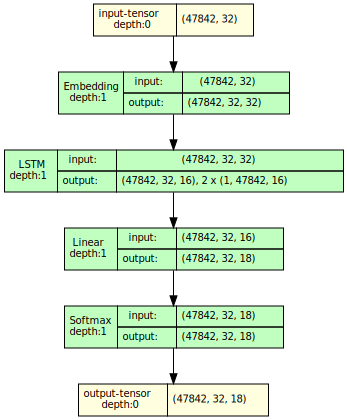

In [ ]:
# TODO: Instantiate the LSTM module we created earlier with the correct dimensionality
# lstm = ...
lstm = WordClassifierLSTM(num_hidden_layers=1, hidden_dim=16, output_dim=n_tags+1, num_embeddings=n_words+1, embedding_dim=32)

# Visualise the model
import torchview

print("Number of trainable parameters =", sum(p.numel() for p in lstm.parameters() if p.requires_grad))
model_graph = torchview.draw_graph(lstm, input_data=x_train)
model_graph.visual_graph

*Note: `torchview` doesn't pick up on the number of internal hidden layers of the LSTM block.*

You should be able to see all the dimensions we set appearing in the model. Remember, we want to input a batch of sequences, shape `(num_sequences, max_sequence_length)`, and return the probabilities of each label for each word in the sequence (shape `(num_sequences, max_sequence_length, num_tags+1)`).

Applying the LSTM to some examples from the training data works as expected:


In [ ]:
example_output = lstm(x_train[:3, ...])
print(example_output)
print(example_output.shape)

tensor([[[0.0583, 0.0488, 0.0684,  ..., 0.0506, 0.0553, 0.0419],
         [0.0498, 0.0533, 0.0717,  ..., 0.0478, 0.0698, 0.0425],
         [0.0512, 0.0529, 0.0674,  ..., 0.0516, 0.0617, 0.0440],
         ...,
         [0.0600, 0.0553, 0.0636,  ..., 0.0474, 0.0574, 0.0391],
         [0.0598, 0.0555, 0.0634,  ..., 0.0474, 0.0575, 0.0391],
         [0.0596, 0.0556, 0.0633,  ..., 0.0474, 0.0576, 0.0391]],

        [[0.0523, 0.0532, 0.0578,  ..., 0.0436, 0.0666, 0.0515],
         [0.0443, 0.0584, 0.0630,  ..., 0.0444, 0.0733, 0.0480],
         [0.0541, 0.0550, 0.0757,  ..., 0.0430, 0.0631, 0.0469],
         ...,
         [0.0602, 0.0554, 0.0634,  ..., 0.0472, 0.0576, 0.0397],
         [0.0600, 0.0555, 0.0633,  ..., 0.0473, 0.0576, 0.0394],
         [0.0598, 0.0556, 0.0633,  ..., 0.0473, 0.0576, 0.0393]],

        [[0.0569, 0.0501, 0.0694,  ..., 0.0441, 0.0677, 0.0463],
         [0.0540, 0.0519, 0.0652,  ..., 0.0485, 0.0661, 0.0445],
         [0.0565, 0.0504, 0.0609,  ..., 0.0469, 0.0597, 0.

We passed in 3 sentences of length 32. For each word in each sentence, the model predicts a probability that it belongs to each of the 18 classes.

📝 **Fill in the gaps below to complete the training loop.**

*You might want to set `n_training_steps` to a smaller number when testing your code. When your code works, set it back to 500. Training should take ~ 1 minute.*

In [ ]:
from tqdm import trange

# Loss function for classification
# Compute the loss by doing loss_fn(predictions, targets)
loss_fn = nn.CrossEntropyLoss()

n_training_steps = 500
optimiser = torch.optim.Adam(lstm.parameters(), lr=0.01)

# At each step, we will randomly sample a batch of data
train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=1024)

progress_bar = tqdm(range(n_training_steps))
train_loss_history = torch.empty(n_training_steps)

for step in progress_bar:
  # Sample a batch of training data
  x_train_batch, y_train_batch = next(iter(train_loader))

  # TODO: Ensure that the inputs are int tensors and the outputs are float tensors
  # ...
  x_train_batch = x_train_batch.to(dtype=torch.int)
  y_train_batch = y_train_batch.to(dtype=torch.float)

  # TODO: Perform the forward pass through the model
  # ...
  predictions = lstm(x_train_batch)

  # TODO: Compute the training loss
  # ...
  train_loss = loss_fn(predictions, y_train_batch)

  # TODO: Perform a gradient step. This should be 3 distinct function calls.
  # ...
  optimiser.zero_grad()
  train_loss.backward()
  optimiser.step()

  progress_bar.set_description(f"Train loss = {train_loss}")


Train loss = 5.481489658355713: 100%|██████████| 500/500 [01:04<00:00,  7.76it/s]


📝 **Fill in the gaps below to complete the model evaluation.**

Note that we have wrapped the evaluation loop in `with torch.no_grad()`. This temporarily disables gradient tracking for the tensors in this loop, reducing the compute required for each operation.


In [ ]:
with torch.no_grad():
  # TODO: Compute the model predictions for the test set
  # ...
  prediction_probabilities = lstm(x_test)

  # TODO: Convert predictions from probabilities into labels
  # ...
  prediction_label = prediction_probabilities.argmax(-1)

  # TODO: Convert the one-hot-encoded y_test into labels
  # ...
  true_label = y_test.argmax(axis=-1)

  # TODO: Compute the loss on the test set
  # ...
  test_loss = loss_fn(prediction_probabilities, y_test)

  # TODO: Compute the accuracy on the test set
  # Accuracy is defined as the % of prediction labels that match the true labels
  # ...
  test_accuracy = torch.sum(prediction_label == true_label) / (y_test.shape[0] * y_test.shape[1])

print(f"Test loss = {test_loss.item() : .3f}")
print(f"Test accuracy = {test_accuracy.item() * 100 : .3f}%")


Test loss =  5.492
Test accuracy =  97.006%


We can visualise an example to gain an understanding of what the model's performance looks like in practice.

In [ ]:
example = 4
example_words = [i_to_token[i.item()] for i in x_test[example]]
example_tags = [i_to_tag[i.item()] for i in true_label[example]]
predicted_tags = [i_to_tag[i.item()] for i in prediction_label[example]]

pd.DataFrame(
    {
        "Word": example_words,
        "True tag": example_tags,
        "Predicted tag": predicted_tags
     }
)

,Word,True tag,Predicted tag
0,The,O,O
1,protest,O,O
2,comes,O,O
3,on,O,O
4,the,O,O
5,eve,O,O
6,of,O,O
7,the,O,O
8,annual,O,O
9,conference,O,O


---
### **2.3 - Extensions 📝**

These tasks are a bit more open ended. Feel free to discuss them with your peers or TAs. You might want to come back to them after completing the rest of the lab - the content in the next section on tokenization and input encoding is higher priority.

- Quantify how well the network is performing for each class. What do you observe? What could be the cause? What could be done to mitigate this?
- Explore the impact of adjusting the sentence length, dimensions of the embedding/hidden/output layers, and number of LSTM layers on the performance and training time of the model.
- Try setting `bidirectional=True` in the LSTM layer of the model. What does this flag do? Why might it be expected to improve performance? Does it improve performance in practice?

---
## **3 - Movie genre prediction** 📝
---

In the previous section, we performed classification on language data at the *word* level (assigning labels to individual words).
In this section, we will instead perform classification at the *sequence* level, aiming to predict the genre of a movie from a summary of its plot (consisting of many words).

As much of the content of this section is similar to the previous one, lots of the code is written for you.
The key additional components introduced in this section are:

**1. Tokenization and lemmatization** (appears in section *Data preprocessing*).

**2. Using pre-trained embeddings** (appears in sections *Data preprocessing - Input encoding* and *LSTM training - Loading pre-trained weights*).

---

### **3.1 - Data preprocessing** 📝


#### Loading the data

In [ ]:
import pandas as pd
import torch

movies_data = pd.read_csv("data/movies.csv").drop(columns=["Release Year", "Origin/Ethnicity", "Director", "Cast", "Wiki Page"])
genre_is_unknown = movies_data["Genre"].isin(["Unknown", "unknown"])
movies_data = movies_data[~genre_is_unknown].reset_index(drop=True)
movies_data.head()

,Title,Genre,Plot
0,The Great Train Robbery,western,The film opens with two bandits breaking into ...
1,The Suburbanite,comedy,The film is about a family who move to the sub...
2,Dream of a Rarebit Fiend,short,The Rarebit Fiend gorges on Welsh rarebit at a...
3,From Leadville to Aspen: A Hold-Up in the Rockies,short action/crime western,The film features a train traveling through th...
4,Kathleen Mavourneen,short film,Irish villager Kathleen is a tenant of Captain...


In [ ]:
print(f"Total number of movies: {len(movies_data)}")
print(f"Total number of genres: {len(movies_data['Genre'].unique())}")
print(f"Genres: {movies_data['Genre'].unique()}")
print(f"Example plot: {movies_data['Plot'][0]}")

Total number of movies: 28803
Total number of genres: 2264
Genres: ['western' 'comedy' 'short' ... 'adventure, romance, fantasy film' 'ero'
 'horror romantic comedy']
Example plot: The film opens with two bandits breaking into a railroad telegraph office, where they force the operator at gunpoint to have a train stopped and to transmit orders for the engineer to fill the locomotive's tender at the station's water tank. They then knock the operator out and tie him up. As the train stops it is boarded by the bandits‍—‌now four. Two bandits enter an express car, kill a messenger and open a box of valuables with dynamite; the others kill the fireman and force the engineer to halt the train and disconnect the locomotive. The bandits then force the passengers off the train and rifle them for their belongings. One passenger tries to escape but is instantly shot down. Carrying their loot, the bandits escape in the locomotive, later stopping in a valley where their horses had been left.
Meanwhi

#### Simplifying the text

Looking at the data, we can see that the genre label for each film can contain multiple different genres. This is a bit complicated for what we want to do here, so we simplify them below.



In [ ]:
import re
from collections import OrderedDict

def simplify_genre(genre):
    genre_map = OrderedDict([
        (("docu", "nature"), "documentary"),
        (("western", "cowboy"), "western"),
        (("sci",), "scifi"),
        (("horror", "slasher"), "horror"),
        (("rom", "love"), "romance"),
        (("bio",), "bio"),
        (("fantasy",), "fantasy"),
        (("crime",), "crime"),
        (("thriller", "mystery", "spy", "suspense", "detective"), "thriller"),
        (("action", "superhero", "martial"), "action"),
        (("adventure",), "adventure"),
        (("war",), "war"),
        (("anim", "cartoon"), "animation"),
        (("com", "satire", "parody"), "comedy"),
        (("drama",), "drama"),
    ])
    for keywords, category in genre_map.items():
        if any(keyword in genre for keyword in keywords):
            return category
    return "other"

movies_data["Genre"] = movies_data["Genre"].apply(simplify_genre)
movies_data.head()

,Title,Genre,Plot
0,The Great Train Robbery,western,The film opens with two bandits breaking into ...
1,The Suburbanite,comedy,The film is about a family who move to the sub...
2,Dream of a Rarebit Fiend,other,The Rarebit Fiend gorges on Welsh rarebit at a...
3,From Leadville to Aspen: A Hold-Up in the Rockies,western,The film features a train traveling through th...
4,Kathleen Mavourneen,other,Irish villager Kathleen is a tenant of Captain...


The plot summaries are also very long; we're going to truncate them to speed up execution for this lab.


In [ ]:
max_n_words = 100
movies_data["Plot"] = movies_data["Plot"].map(lambda x: ' '.join(x.split()[:max_n_words]) if len(x.split()) > max_n_words else x)

In [ ]:
movies_data["Plot"]

,Plot
0,The film opens with two bandits breaking into ...
1,The film is about a family who move to the sub...
2,The Rarebit Fiend gorges on Welsh rarebit at a...
3,The film features a train traveling through th...
4,Irish villager Kathleen is a tenant of Captain...
...,...
28798,"Zeynep lost her job at weaving factory, and he..."
28799,"Two musicians, Salih and Gürkan, described the..."
28800,"Zafer, a sailor living with his mother Döndü i..."
28801,The film centres around a young woman named Am...


#### Inspecting the data 📝

It's often useful to visualise the data before you pipe it into an ML model. This could help you understand some of the behaviour of the trained model, or inform choices about architecture such as layer width.

📝 **In the cell below, plot a bar chart of the genres in the database against the number of times they appear.**

Text(0.5, 0, 'Count')

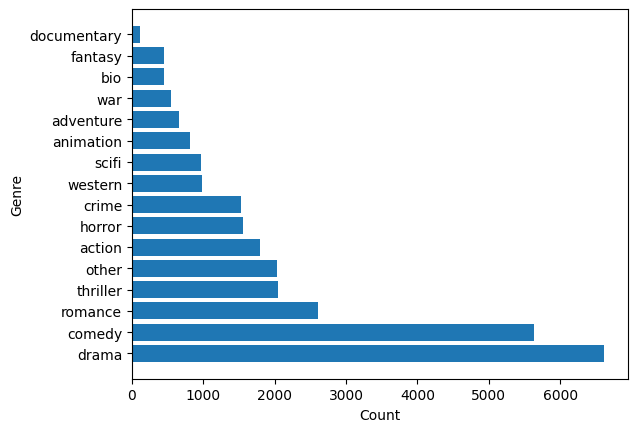

In [ ]:
import matplotlib.pyplot as plt

# TODO: Plot a bar chart of the genres against their counts
# ...
counts = movies_data["Genre"].value_counts()
plt.barh(counts.index, counts.array)
plt.ylabel("Genre")
plt.xlabel("Count")

📝 **What do you notice? What effect might this have on our model?**

In [ ]:
# TODO: Your answer here
# ...

#### Selecting a subset of the data

Because this is quite a big dataset, we're going to downsample to make training a bit faster.

In [ ]:
movies_downsampled = movies_data.sample(frac=0.4, random_state=42)
movies_downsampled.drop(movies_downsampled.loc[movies_downsampled['Genre']=='drama'].index, inplace=True)
print(f"Downsampled to {len(movies_downsampled)}")

Downsampled to 8857


#### Tokenization & lemmatization 📝

*Tokenization* is the process of splitting paragraphs and sentences into smaller units that can be more easily assigned meaning.

*Lemmatization* is the process of grouping together the different forms of a word so that they can be analysed as a single item, identified by the word's lemma (dictionary form). For instance, in English, the verb 'watch' may appear as 'watch', 'watched', 'watches' or 'watching'. The base form, 'watch' is called the lemma for the word.


In the previous section on named entity recognition, we performed a very simple ad-hoc tokenization process - treating each word as an individual token.
While this worked ok for the simple NER task, to do someting more beefy we're going to need to do full tokenization and lemmatization using an off-the-shelf pre-trained tokenizer and lemmatizer.

We're using a model from SpaCy, a fairly straightforward library for simple NLP tasks. Running the SpaCy tokenizer takes a few minutes; in the next lab, you will use tokenizers from HuggingFace that are much more efficient.


In [ ]:
import spacy
from tqdm import tqdm

# Load a pretrained tokenizer
spacy.cli.download("en_core_web_md")
tokenizer = spacy.load("en_core_web_md")

# Create an iterator that performs the tokenization and lemmatization
movie_plots = tokenizer.pipe(movies_downsampled['Plot'], batch_size=128, n_process=1)

n_movie_plots = len(movies_downsampled['Plot'])
movie_plot_tokens_str = []

# Iterate over all the synopses
for synopsis in tqdm(movie_plots, total=n_movie_plots):
    token_strs = []

    # Iterate over all the tokens in this synopsis
    for token in synopsis:
        if token.is_alpha and not token.is_stop:
            # Get the string version of the lemmatised token
            token_strs.append(token.lemma_.lower())

    movie_plot_tokens_str.append(token_strs)


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


100%|██████████| 8857/8857 [02:24<00:00, 61.50it/s]


 📝 **In the next cell, compare some of the movies' plots before and after tokenisation and lemmatization.**

In [ ]:
# TODO: display some movie plot summaries before and after the tokenisation+lemmatization process
# ...
n_chars = 128
n_tokens = 10

for i in range(4):
  print("Input:\t", movies_downsampled['Plot'].iloc[i][:n_chars])
  print("Tokenized and lemmatized: \t", movie_plot_tokens_str[i][:n_tokens])
  print("\n")

Input:	 Bugs is spring cleaning until he notices a whole stampede of animals running away in fear. He manages to stop a turtle, who stat
Tokenized and lemmatized: 	 ['bugs', 'spring', 'cleaning', 'notice', 'stampede', 'animal', 'run', 'away', 'fear', 'manage']


Input:	 Ravi (Vijay), a youth from Thoothukudi, aspires to become a policeman like his role model, Chennai-based Encounter Specialist DC
Tokenized and lemmatized: 	 ['ravi', 'vijay', 'youth', 'thoothukudi', 'aspire', 'policeman', 'like', 'role', 'model', 'chennai']


Input:	 The film is a love story between a prince and a gypsy girl, based on a Parsi play written by Joseph David. David later served as
Tokenized and lemmatized: 	 ['film', 'love', 'story', 'prince', 'gypsy', 'girl', 'base', 'parsi', 'play', 'write']


Input:	 In the slums of New York, on the East River just below the Queensboro Bridge, wealthy people live in opulent and luxurious apart
Tokenized and lemmatized: 	 ['slum', 'new', 'york', 'east', 'river', 'queensbo

 📝 **What kinds of words have been removed? Which line of code is the cause of this?**

 📝 **Give 3 examples of lemmatization. Which line of the code is the cause?**

In [ ]:
# TODO: Your answer here

# Word removal:
# ...

# Lemmatisation:
# ...
# 1.
# 2.
# 3.

#### Input encoding 📝

To improve the performance of our LSTM, we're going to use a pre-trained embedding layer. If we don't have to learn meaningful representations of the words *themselves* during training, more of the training time can be spent learning the relationships *between* the words.

We're going to use embeddings learnt using the `word2vec` algorithm, applied to a collection of data from Wikipedia. This should have a sufficiently wide vocabulary so that most the words in our movie summaries can be represented.

*Note: downloading the embeddings can be a bit slow!*

In [ ]:
from gensim.models import Word2Vec
import gensim.downloader as api

word2vec_embeddings = api.load('glove-wiki-gigaword-50')

[==================================================] 100.0% 66.0/66.0MB downloaded


`word2vec` supplies the functions we need for encoding and embedding - it's effectively a big look-up table, mapping between words, token indices, and embedding vectors.

In [ ]:
print("'hello' has index", word2vec_embeddings.get_index("hello"), "and vector embedding",  word2vec_embeddings.get_vector("hello"))
print(f"'{word2vec_embeddings.index_to_key[100]}' has index 100 and vector embedding", word2vec_embeddings.get_vector(100))

print("Embedding matrix is shape", word2vec_embeddings.vectors.shape)

'hello' has index 13075 and vector embedding [-0.38497   0.80092   0.064106 -0.28355  -0.026759 -0.34532  -0.64253
 -0.11729  -0.33257   0.55243  -0.087813  0.9035    0.47102   0.56657
  0.6985   -0.35229  -0.86542   0.90573   0.03576  -0.071705 -0.12327
  0.54923   0.47005   0.35572   1.2611   -0.67581  -0.94983   0.68666
  0.3871   -1.3492    0.63512   0.46416  -0.48814   0.83827  -0.9246
 -0.33722   0.53741  -1.0616   -0.081403 -0.67111   0.30923  -0.3923
 -0.55002  -0.68827   0.58049  -0.11626   0.013139 -0.57654   0.048833
  0.67204 ]
'so' has index 100 and vector embedding [ 6.0308e-01 -3.2024e-01  8.8857e-02 -5.5176e-01  5.3182e-01  4.7069e-02
 -3.6246e-01  5.7018e-03 -3.7665e-01  2.2534e-01 -1.3534e-01  3.5988e-01
 -4.2518e-01  7.1324e-02  7.7065e-01  5.6712e-01  4.1226e-01  1.2451e-01
  1.4230e-01 -9.6535e-01 -3.9053e-01  3.4199e-01  5.6969e-01  3.1635e-02
  6.9465e-01 -1.9216e+00 -6.7118e-01  5.7971e-01  8.6088e-01 -5.9105e-01
  3.7787e+00  3.0431e-01 -4.3103e-02 -4.2398e-01 

📝 **Complete the code below to transform a sentence between string and index representations.**


In [ ]:
sentence = "the quick brown fox jumped over the lazy dog"

# TODO: Complete the code
# ...
str_sequence = sentence.split()
idx_sequence = [word2vec_embeddings.get_index(tok) for tok in str_sequence]
reconstructed_str_sequence = [word2vec_embeddings.index_to_key[idx] for idx in idx_sequence]

print("Original:", str_sequence)
print("Encoded:", idx_sequence)
print("Reconstructed: ", reconstructed_str_sequence)

Original: ['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog']
Encoded: [0, 2582, 1042, 2106, 3450, 74, 0, 16531, 2926]
Reconstructed:  ['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog']


However, as we now have a set of embeddings defined from an external source, we might encounter scenarios where we want to represent a word that isn't found in the lookup table. When this occurs, we need to come up with some way of representing the unknown word.

A good choice for the vector representation of an unknown word is to use the *mean* of all vectors in the table. This ensures that the "unknown" isn't treated as a word that means something specific, which could lead to odd behaviour.

📝 **Use `word2vec_embeddings.add_vector` to add the following token to the embedding table:**
- **String representation `\0` (= the null character).**
- **Embedding vector equal to the average of the embedding matrix.** Note that the embedding dimension must match (=50), so you must be careful with the axis you take the mean along.

**Replace all the nouns in the sentence above with the new token, `\0`. Copy and paste your code from before to demonstrate that the encoding and decoding works correctly with the new token.**

In [ ]:
# TODO: Add the \0 token to the embeddings
# ...
m = word2vec_embeddings.vectors.mean(axis=0)
word2vec_embeddings.add_vector(key="\0", vector=m)

/usr/local/lib/python3.11/dist-packages/gensim/models/keyedvectors.py:551: UserWarning: Adding single vectors to a KeyedVectors which grows by one each time can be costly. Consider adding in batches or preallocating to the required size.
  warnings.warn(


400000

In [ ]:
# TODO: Check that \0 is encoded and decoded correctly
sentence = "the \0 brown \0 jumped over the lazy \0"

str_sequence = sentence.split()
idx_sequence = [word2vec_embeddings.get_index(tok) for tok in str_sequence]
reconstructed_str_sequence = [word2vec_embeddings.index_to_key[idx] for idx in idx_sequence]

print("Original:", str_sequence)
print("Encoded:", idx_sequence)
print("Reconstructed: ", reconstructed_str_sequence)

Original: ['the', '\x00', 'brown', '\x00', 'jumped', 'over', 'the', 'lazy', '\x00']
Encoded: [0, 400000, 1042, 400000, 3450, 74, 0, 16531, 400000]
Reconstructed:  ['the', '\x00', 'brown', '\x00', 'jumped', 'over', 'the', 'lazy', '\x00']


Now we need to define a function that replaces unknown words in the input with  the null character.

📝 **Fill in the `encode` function below. Your function should turn a sequence of string tokens into a sequence of token indices, while replacing unknown tokens with `\0`.**



In [ ]:
def encode(list_of_str: list[str]) -> list[int]:
  # TODO:
  # ...
  list_of_idx = []
  for s in list_of_str:
    try:
      list_of_idx.append(word2vec_embeddings.get_index(s))
    except:
      list_of_idx.append(word2vec_embeddings.get_index('\0'))
  return list_of_idx

# Apply the encode function to the dataset
movie_plot_tokens_idx = list(map(encode, movie_plot_tokens_str))
print(movie_plot_tokens_idx[:10])

[[12430, 1509, 7330, 3995, 16636, 2694, 307, 420, 1655, 4210, 837, 13841, 92, 23095, 6697, 5128, 346, 23095, 6697, 12430, 242, 2924, 662, 13837, 4466, 79928, 562, 400000, 11655, 57606, 11042, 3623, 2694, 488, 12425, 79928, 1650, 125187, 2432, 12425, 539, 169, 11035, 999, 12430, 234, 9916, 5716, 79928, 161], [20523, 15325, 1875, 138691, 25808, 6856, 117, 542, 1423, 14392, 815, 5991, 4875, 136368, 180846, 48402, 260641, 1336, 15496, 1224, 2420, 1266, 1429, 499, 14392, 3546, 3849, 756, 1203, 2612, 42741, 746, 700, 419, 732, 1162, 197445, 137850, 39697, 807, 835, 9679, 197445, 5903, 20523, 2048, 20523, 169, 275, 7400, 291878, 4372, 320, 197445, 1058, 1452, 377, 1067, 180846, 11923, 142], [319, 835, 523, 1781, 17386, 1749, 815, 67135, 282, 2432, 1969, 684, 684, 168, 1367, 1541, 46953, 319, 128, 523, 1437, 16933, 2245, 1142, 213, 1859, 400000, 444, 1395, 691, 7267, 43224, 2985, 136, 702, 400000, 34095, 400000, 34095, 7914, 15987, 81780, 6326, 400000, 3045, 691, 8141, 400000, 3130, 1266, 4160

You should be able to see some values `400000` appearing in the encoded data.


Finally, as before, we need to pad the input so that all sequences are the same length.
This time, we'll use an in-built PyTorch function.

In [ ]:
from torch.nn.utils.rnn import pad_sequence

pad_token_str = "\0"
pad_token_idx = word2vec_embeddings.get_index(pad_token_str)

movie_plot_tokens_idx_padded = pad_sequence([torch.tensor(a, dtype=int) for a in movie_plot_tokens_idx], batch_first=True, padding_value=pad_token_idx)

x = movie_plot_tokens_idx_padded

In [ ]:
movie_plot_tokens_idx_padded.shape

torch.Size([8857, 75])

#### Output encoding

This is pretty much identical to the previous example. We transform the genres into class labels, and the labels into one-hot vectors.

In [ ]:
from torch import nn

# Convert text genre labels to integer labels
genres = movies_downsampled["Genre"].unique()
class_labels = torch.arange(len(genres))
genre_to_label = {g: l.item() for g, l in zip(genres, class_labels)}
movies_downsampled["class"] = movies_downsampled["Genre"].map(lambda x: genre_to_label[x])

# Convert integer labels to one-hot vectors
y = nn.functional.one_hot(torch.tensor(movies_downsampled["class"].values), num_classes=len(genres))

In [ ]:
genres

array(['animation', 'action', 'other', 'crime', 'comedy', 'horror',
       'fantasy', 'thriller', 'adventure', 'bio', 'scifi', 'western',
       'romance', 'documentary', 'war'], dtype=object)

#### Train/test split

This is exactly identical to the previous example.

In [ ]:
test_fraction = 0.2
validation_fraction = 0.1
train_fraction = 0.7

torch.manual_seed(0)
train_data, validation_data, test_data = torch.utils.data.random_split(
    dataset=torch.utils.data.TensorDataset(x, y),
    lengths=[
        train_fraction,
        validation_fraction,
        test_fraction,
    ],
)

x_train, y_train = train_data.dataset.tensors
x_validation, y_validation = validation_data.dataset.tensors
x_test, y_test = test_data.dataset.tensors

y_test = y_test.to(dtype=torch.float32)

---

### **3.2 LSTM training and evaluation 📝**

In this section, we'll use the nicely prepared data to train an LSTM. There are a few changes we have to make in order to make the model appropriate for the genre classification task.


#### Modifying the LSTM for sequence classification 📝

In the NER task, we were considering classification of *words*. This meant that as each new word came into the LSTM layer of our model we wanted to produce an output value, leading to the output having shape `(batch_size, sequence_length, num_classes)`.


In order to classify at the *sequence* level, we want to produce an output of shape `(batch_size, num_classes)`- one label for each sequence in the dataset (in this case, the plot summaries).

Rather than caring about what the LSTM layer generates as each new word is fed in, this means that we want to extract the final state of the LSTM after it's seen the full sequence. **This is exactly the `hidden_state` variable produced when the LSTM layer is called.**


 📝 **Implement the forward method for the `SequenceClassifierLSTM` class. Instead of using the output value of the LSTM layer, use the hidden_state value.**

In [ ]:
class SequenceClassifierLSTM(nn.Module):
    def __init__(self, num_hidden_layers, hidden_dim, output_dim, num_embeddings, embedding_dim):
        super().__init__()
        self.embedding = torch.nn.Embedding(num_embeddings, embedding_dim)
        self.lstm = torch.nn.LSTM(input_size=embedding_dim, hidden_size=hidden_dim, batch_first=True, num_layers=num_hidden_layers)
        self.dense = torch.nn.Linear(in_features=hidden_dim, out_features=output_dim)
        self.softmax = torch.nn.Softmax(dim=-1)

    def forward(self, x):
        # TODO: Implement the forward method for the SequenceClassifierLSTM
        # ...
        x = self.embedding(x)
        _, (hidden_state, _) = self.lstm(x)
        x = self.dense(hidden_state[-1, ...])
        x = self.softmax(x)
        return x

#### Loading pre-trained weights for the embedding layer 📝

As we're using a pre-trained embedding layer, we need to construct the model with the correct dimensions.
The weights for the embedding layer will be given by `word2vec_embeddings.vectors`.



In [ ]:
embedding_matrix = torch.tensor(word2vec_embeddings.vectors)
embedding_matrix.shape

torch.Size([400001, 50])

 📝 **Instantiate a SequenceClassifierLSTM with 1 hidden layer, hidden_dim of 128, and appropriate values for the other dimensions.**

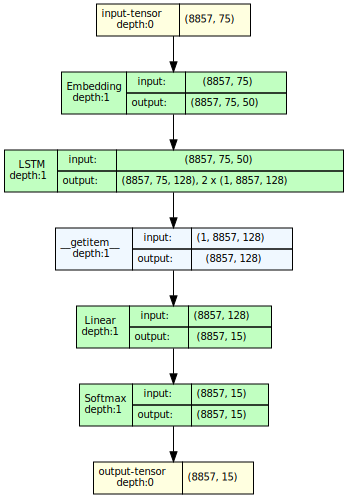

In [ ]:
# TODO: Instantiate a SequenceClassifierLSTM
# ...
lstm = SequenceClassifierLSTM(num_hidden_layers=1, hidden_dim=128, output_dim=len(genres), num_embeddings=embedding_matrix.shape[0], embedding_dim=embedding_matrix.shape[1])

# Visualise
model_graph = torchview.draw_graph(lstm, input_data=x_train)
model_graph.visual_graph


To load the pretrained weights, we need to overwrite the `lstm.embedding` layer with a new layer constructed from the `embedding_matrix`.
We set `freeze=True`, so that these parameters are marked as not trainable.

In [ ]:
print("Trainable parameters before: ", [name for name, p in lstm.named_parameters() if p.requires_grad])
lstm.embedding = nn.Embedding.from_pretrained(embedding_matrix, freeze=True)
print("Trainable parameters after: ", [name for name, p in lstm.named_parameters() if p.requires_grad])

Trainable parameters before:  ['embedding.weight', 'lstm.weight_ih_l0', 'lstm.weight_hh_l0', 'lstm.bias_ih_l0', 'lstm.bias_hh_l0', 'dense.weight', 'dense.bias']
Trainable parameters after:  ['lstm.weight_ih_l0', 'lstm.weight_hh_l0', 'lstm.bias_ih_l0', 'lstm.bias_hh_l0', 'dense.weight', 'dense.bias']


You can see that the `embedding.weight` has disappeared from the trainable parameters.

#### Training 📝

 📝 **Now it's over to you! Using the previous LSTM training and test code as a template, train the SequenceClassifierLSTM on the data.**

 - Use a learning rate of 1e-3.
 - Use a batch size of 32.
 - *Hint: your first attempt might fail due to a tensor shape mismatch. You can use `.squeeze()` to discard any unwanted dimensions of a tensor with length 1.*


In [ ]:
# TODO: Train a SequenceClassifierLSTM on the data
# ...

from tqdm import trange

# Loss function for classification
# Compute the loss by doing loss_fn(predictions, targets)
loss_fn = nn.CrossEntropyLoss()

n_training_steps = 500
optimiser = torch.optim.Adam(lstm.parameters(), lr=1e-3)

# At each step, we will randomly sample a batch of data
train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=32)

progress_bar = tqdm(range(n_training_steps))
train_loss_history = torch.empty(n_training_steps)

for step in progress_bar:
  # Sample a batch of training data
  x_train_batch, y_train_batch = next(iter(train_loader))

  # TODO: Ensure that the inputs are int tensors and the outputs are float tensors
  # ...
  x_train_batch = x_train_batch.to(dtype=torch.int)
  y_train_batch = y_train_batch.to(dtype=torch.float)

  # TODO: Perform the forward pass through the model
  # ...
  predictions = lstm(x_train_batch).squeeze()

  # TODO: Compute the training loss
  # ...
  train_loss = loss_fn(predictions, y_train_batch)

  # TODO: Perform a gradient step. This should be 3 distinct function calls.
  # ...
  optimiser.zero_grad()
  train_loss.backward()
  optimiser.step()

  progress_bar.set_description(f"Train loss = {train_loss}")


Train loss = 2.6914894580841064: 100%|██████████| 500/500 [00:33<00:00, 14.73it/s]


In [ ]:
# TODO: Test your trained model
# ...
with torch.no_grad():
  prediction_probabilities = lstm(x_test).squeeze()
  prediction_label = prediction_probabilities.argmax(-1)
  true_label = y_test.argmax(axis=-1)
  test_loss = loss_fn(prediction_probabilities, y_test)
  test_accuracy = torch.sum(prediction_label == true_label) / (y_test.shape[0])

print(f"Test loss = {test_loss.item() : .3f}")
print(f"Test accuracy = {test_accuracy.item() * 100 : .3f}%")


Test loss =  2.557
Test accuracy =  25.934%


 📝 **What do you think of the model's performance? What could be done to improve it?**


In [ ]:
# TODO: Your answer here
# ...